In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#분류 Dicision Tree
from sklearn.tree import DecisionTreeClassifier
#데이터 분할
from sklearn.model_selection import train_test_split
#confusion matrix
from sklearn.metrics import confusion_matrix

import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

In [2]:
import os

os.environ['PATH'] += os.pathsep + '/home/piai/anaconda3/lib/python3.8/site-packages'

In [3]:
matplotlib.rc('font', family = 'NanumGothic')

In [14]:
df_raw = pd.read_csv('/home/piai/Downloads/IRIS.csv', engine = 'python')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
df_raw = pd.read_csv('/home/piai/Downloads/HMEQ.csv', engine = 'python')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGTH  150 non-null    float64
 1   SEPAL_WIDTH   150 non-null    float64
 2   PETAL_LENGTH  150 non-null    float64
 3   PETAL_WIDTH   150 non-null    float64
 4   SPECIES       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 결측치 제거

In [8]:
df_raw.isnull().sum(axis = 0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [9]:
df_raw['JOB'].value_counts()

KeyError: 'JOB'

In [10]:
#결측치 대체 함수. 
#JOB 변수의 결측치는 other 로 대체
df_raw['JOB'].fillna('Other', inplace = True)

#숫자형 변수의 결측치는 해당 변수의 평균값 입력
df_raw.fillna(df_raw.mean(), inplace = True)

KeyError: 'JOB'

In [11]:
df_raw.isnull().sum(axis = 0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [12]:
#get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)

#더미변수 생성된 데이터의 상위5개 row 확인
df_raw_dummy.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES_setosa,SPECIES_versicolor,SPECIES_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


### 데이터 분할

In [13]:
#train_test_split (X : 설명변수 데이터, Y : 목표변수 데이터, test_size = test 데이터 비율, random_state : random seed)

#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy['SPECIES']
df_raw_x = df_raw_dummy.drop('SPECIES', axis = 1 , inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size = 0.3, random_state = 1234)
print(f'train data X size :{df_train_x.shape}')
print(f'train data Y size :{df_train_y.shape}')
print(f'test data X size :{df_test_x.shape}')
print(f'test data Y size :{df_test_y.shape}')

KeyError: 'SPECIES'

In [15]:
#train_test_split (X : 설명변수 데이터, Y : 목표변수 데이터, test_size = test 데이터 비율, random_state : random seed)

#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['SPECIES']
df_raw_x = df_raw.drop('SPECIES', axis = 1 , inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size = 0.3, random_state = 1234)
print(f'train data X size :{df_train_x.shape}')
print(f'train data Y size :{df_train_y.shape}')
print(f'test data X size :{df_test_x.shape}')
print(f'test data Y size :{df_test_y.shape}')

train data X size :(105, 4)
train data Y size :(105,)
test data X size :(45, 4)
test data Y size :(45,)


### 모델 생성


In [28]:
#모델 생성
tree_uncustomized = DecisionTreeClassifier(criterion='gini', random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))


#test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.978


In [70]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecicionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(criterion = 'gini',random_state=1234)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=1234)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)


#train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))


#test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.978


### 모델 parameter 조정
### max_depth: 최대 깊이 변경에 따른 모델 성능


In [71]:
#max_depth: 최대 깊이 변경에 따른 모델 성능
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 1234,
                                 max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

#결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


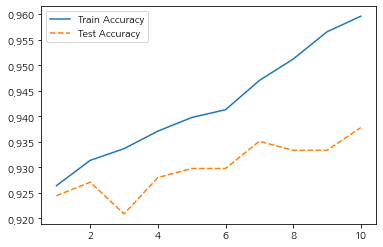

In [72]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = "--", label = 'Test Accuracy')
plt.legend()

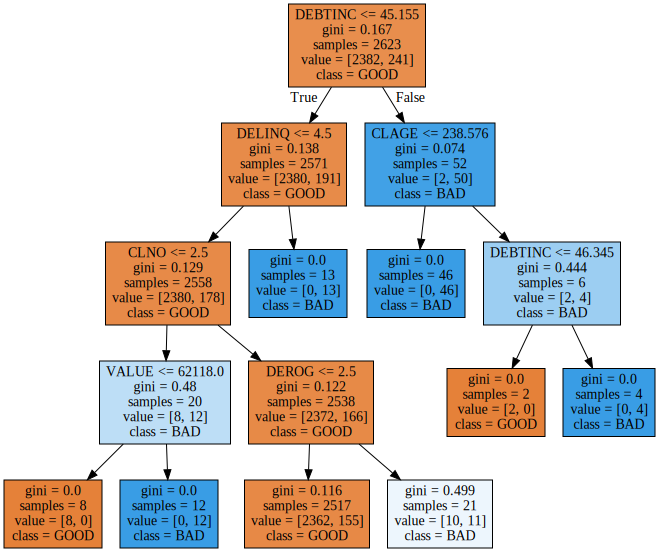

In [73]:
#변수명 저장
v_feature_name = df_train_x.columns

#최대 깊이 = 4 모델
tree_low = DecisionTreeClassifier(max_depth = 4,random_state = 1234)
tree_low.fit(df_train_x , df_train_y)

#트리 모델을 tree_low.dot 파일로 저장(목표변수 , 0: GOOD, 1:BAD)
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['GOOD', 'BAD'], 
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

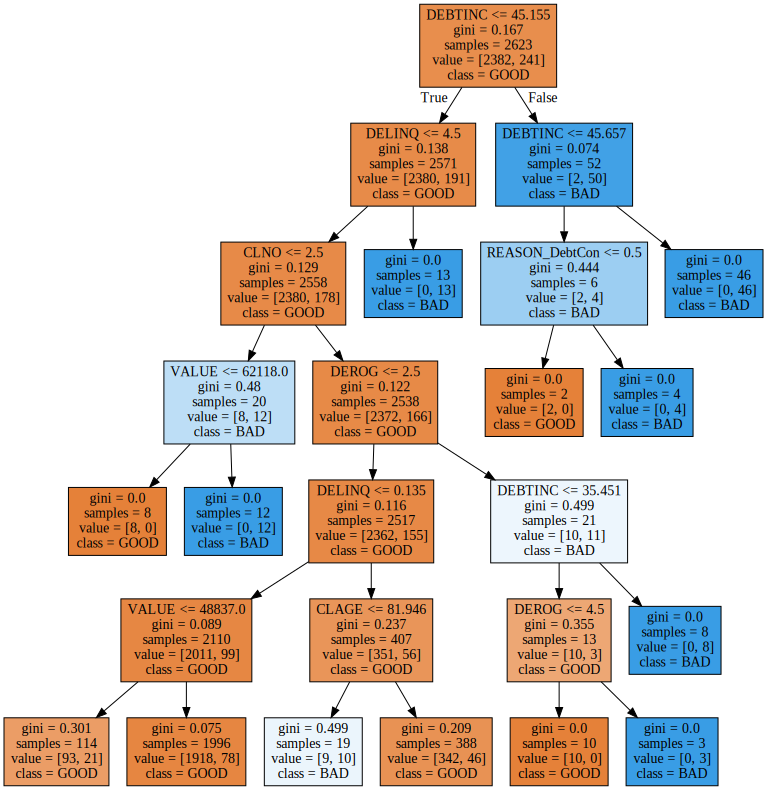

In [74]:
#변수명 저장
v_feature_name = df_train_x.columns

#최대 깊이 = 4 모델
tree_low = DecisionTreeClassifier(max_depth = 6,random_state = 1234)
tree_low.fit(df_train_x , df_train_y)

#트리 모델을 tree_low.dot 파일로 저장(목표변수 , 0: GOOD, 1:BAD)
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['GOOD', 'BAD'], 
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [75]:
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

#min_samples_split : 분리노드 최소 자료 수 * 참조 : para_split : [1,2,3,...,19]

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234,
                                 max_depth = 4,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['Trainaccuracy'] = train_accuracy
df_score_split['Testaccuracy'] = test_accuracy
df_score_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.936,0.928
1,20,0.936,0.928
2,30,0.933,0.921
3,40,0.933,0.921
4,50,0.933,0.921
5,60,0.933,0.921
6,70,0.933,0.921
7,80,0.933,0.921
8,90,0.933,0.921
9,100,0.933,0.921


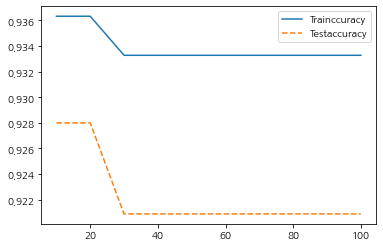

In [76]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = 'Trainccuracy')
plt.plot(para_split, test_accuracy, linestyle = "--", label = 'Testaccuracy')
plt.legend()

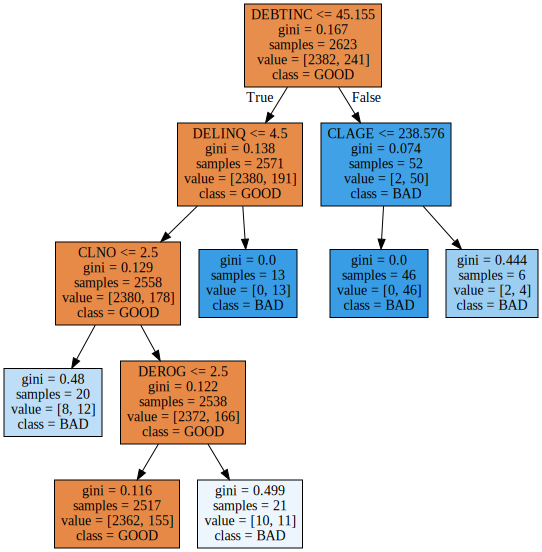

In [77]:
#변수명 저장
v_feature_name = df_train_x.columns

#분리 노드의 최소 자료 수 = 20 모델
tree_low = DecisionTreeClassifier(max_depth = 4,
                                  min_samples_split = 30,
                                  random_state = 1234)
tree_low.fit(df_train_x , df_train_y)
    
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['GOOD', 'BAD'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

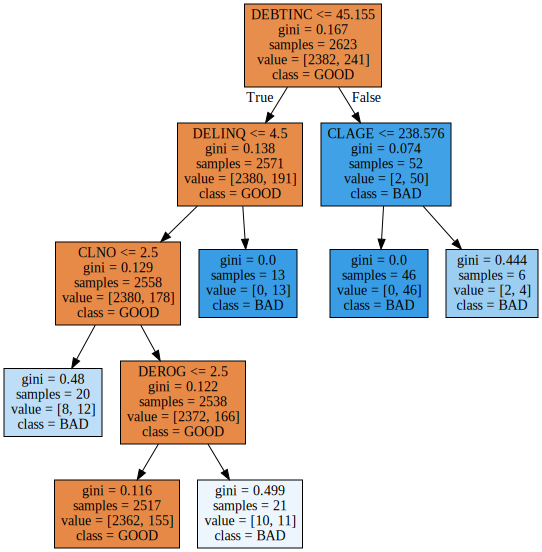

In [78]:
#변수명 저장
v_feature_name = df_train_x.columns

#분리 노드의 최소 자료 수 = 20 모델
tree_high = DecisionTreeClassifier(max_depth = 4,
                                  min_samples_split = 20,
                                  random_state = 1234)
tree_high.fit(df_train_x , df_train_y)
    
export_graphviz(tree_low, out_file = 'tree_high.dot', class_names = ['GOOD', 'BAD'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [79]:
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

#min_samples_leaf : 잎사귀 최소 자료 수 * 참조 : para_leaf : [1,2,3,...,19]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234 , min_samples_leaf = v_min_samples_leaf,
                                  max_depth = 4,
                                  min_samples_split = 20)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainAccuracy'] = train_accuracy
df_score_leaf['TestAccuracy'] = test_accuracy
#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.936,0.928
1,4,0.936,0.928
2,6,0.936,0.928
3,8,0.936,0.928
4,10,0.936,0.928
5,12,0.933,0.921
6,14,0.932,0.917
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


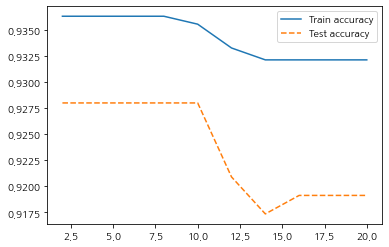

In [80]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = 'Train accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = 'Test accuracy')
plt.legend()

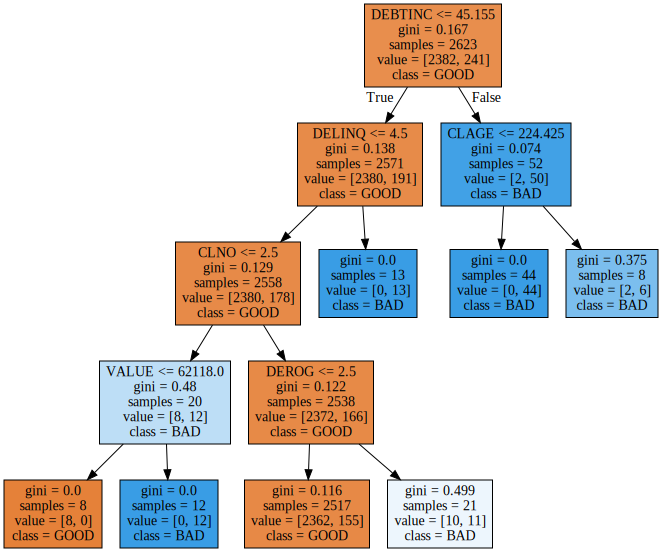

In [81]:
#변수명 저장
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 8 모델
tree_low = DecisionTreeClassifier(random_state = 1234, min_samples_leaf = 8,max_depth = 4,
                                  min_samples_split = 20)
tree_low.fit(df_train_x , df_train_y)
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['GOOD','BAD'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

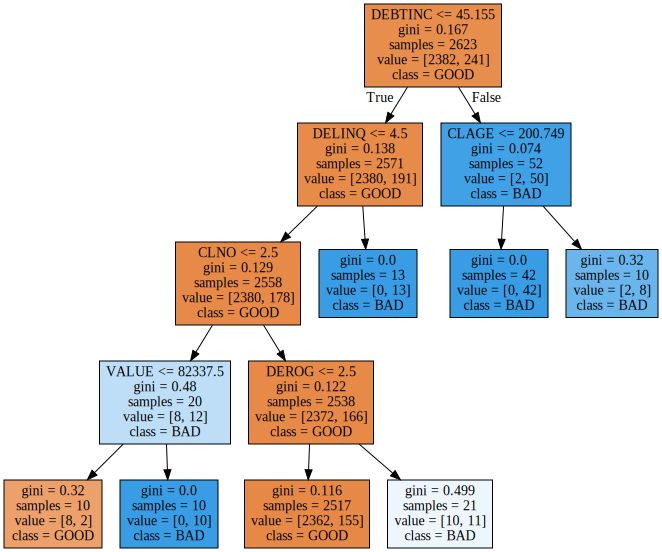

In [83]:
#변수명 저장
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 8 모델
tree_high = DecisionTreeClassifier(random_state = 1234, min_samples_leaf = 10 ,max_depth = 4,
                                  min_samples_split = 20)
tree_high.fit(df_train_x , df_train_y)
export_graphviz(tree_low, out_file = 'tree_high.dot', class_names = ['GOOD','BAD'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 최종 모델 선정

In [48]:
#모델 생성
tree_final = DecisionTreeClassifier(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Score on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on training set : 0.936
Score on test set : 0.928


### 최종 모델 시각화

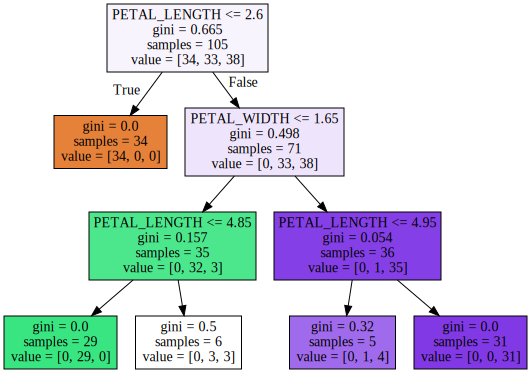

In [36]:
#변수명 저장
v_feature_name = df_train_x.columns
tree_final = DecisionTreeClassifier(min_samples_leaf = 5, min_samples_split = 10, max_depth = 4, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

export_graphviz(tree_final, out_file = 'tree_final.dot',
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 최종 모델 평가

In [37]:
y_pred = tree_final.predict(df_test_x)
print('Accuracy: {0:3f}\n'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.955556

Confusion matrix : 
[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


### 결론 도출
### feature_importances_ : 설명변수의 중요도

In [38]:
#나무를 만들 때 사용되는 변수들의 중요도
#feature_importances_ : 설명변수의 중요도
#tree_final, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,PETAL_LENGTH,0.573
3,PETAL_WIDTH,0.427
0,SEPAL_LENGTH,0.000
1,SEPAL_WIDTH,0.000


Text(0, 0.5, '변수')

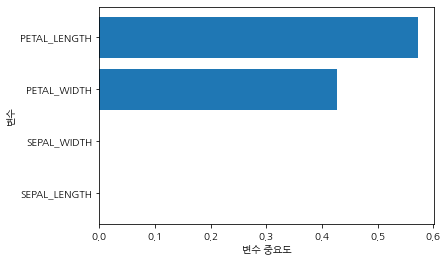

In [39]:
#설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#### 설명변수, 목표변수 데이터 지정, 다음 중요 변수 파악 시 가장 중요도가 높은 변수 삭제 후 다시 진행하기!!
df_train_x2 = df_~~~
v_feature_name = df_train_x2.columns

### GridSearchCV 를 이용한 최적 parameter 찾기

In [54]:
estimator = DecisionTreeClassifier()

#구하고자 하는 parameter 와 범위
param_grid = {'max_depth' : para_depth, 'min_samples_split' : para_split, 'min_samples_leaf': para_leaf}

#정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs =-1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best estimator model : \n {grid_dt.best_estimator_}')
print(f'\nbest parameter : \n {grid_dt.best_params_}')
print(f'\nbest score : \n {grid_dt.best_score_.round(3)}')

best estimator model : 
 DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10)

best parameter : 
 {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}

best score : 
 0.936
